# 서포트 벡터 머신(SVM)
- 머신러닝 방법 중 하나
- 선을 구성하는 매개변수를 조정해서 요소들을 구분하는 선을 찾고, 이를 기반으로 패턴을 인식하는 방법
    - ex) A와 B라는 패턴을 구분하는 방법 -> 패턴 인식의 목표
    - 이를 위해 A와 B를 벡터로 나타내서 평면 위에 올리고 구분선을 그리게 된다.
    - 이 때 패턴의 경계가 되는 것을 "식별 평면"
    - 구분선을 확실하게 정할 수 있으면 이후에 새로운 패턴이 나와도 쉽게 분류가 가능하다.
    - 구분선은 두 패턴의 식별 평면에서 패턴들과의 거리(마진)를 최대로 만드는 것이 가장 좋은 결과이다. -> "마진 최대화" (SVM 특징)
- SVM을 이용하면 알 수 없는 패턴도 제대로 분류할 확률이 매우 높다. -> 학습 이론에서는 "일반화 능력"이라 부른다.

## SVM을 실제로 사용해보기
1. 무작위로 2만 명의 키와 몸무게 데이터 생성
2. 비만도 계산에 사용되는 BMI를 활용해 저체중, 정상, 비만 레이블을 붙인다.
3. 이렇게 만들어진 데이터를 SVM으로 학습, 비만을 정확하게 맞출 수 있는지 테스트

- "컴퓨터가 비만이라는 것을 학습할 수 있을까?"라는 명제를 머신러닝으로 하는 것 <br>
BMI = 몸무게(kg) / (키(m)^2) -> BMI가 18.5 이상, 25 미만일 때 표준 몸무게!

### 무작위로 2만 명의 데이터 생성
"키(m)", "몸무게(kg)", "저체중(thin), 정상(normal), 비만(fat) 레이블" 을 활용해 3개의 칼럼을 갖는 CSV 파일 생성

In [16]:
import random

# BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

# 출력 파일 준비하기
fp = open("bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\r\n") 
# 주의: "height, weight, label\r\n" -> 나중에 열을 자르거나 추출할 때 " label"로 입력해야 되므로 공백없이 write해주자!!

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))

fp.close()
print("OK!!")

OK!!


### SVM에 데이터를 넣어 올바른 레이블을 붙일 수 있는지 확인
데이터를 읽기 -> 학습 -> 테스트

In [33]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기
tbl = pd.read_csv("bmi.csv") # 이렇게 읽어온 tbl은 DataFrame객체

# 칼럼(열)을 자르고 정규화하기
# Pandas를 이용하면 for 구문으로 하나하나 데이터를 처리할 필요 없이 이와 같은 형태로 배열 전체의 요소에 연산을 걸 수 있다.
label = tbl["label"] # CSV 파일의 첫 로우(헤더 로우)에 적힌 이름을 기반으로 필요한 칼럼 추출
w = tbl["weight"] / 100 # 최대 100kg라고 가정 -> 0부터 1의 범위로 정규화
h = tbl["height"] / 200 # 최대 200cm라고 가정 -> 0부터 1의 범위로 정규화
wh = pd.concat([w,h], axis=1)

# 학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)

# 데이터 학습하기
clf = svm.SVC()
# clf = svm.LinearSVC() # 선형 커널 특화된 SVM으로 계산이 빠르며, 다양한 옵션을 가지고 있다.
clf.fit(data_train, label_train)

# 데이터 예측하기
predict = clf.predict(data_test)

# 결과 테스트하기
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 = ", ac_score)
print("리포트 =\n", cl_report)

정답률 =  0.9946
리포트 =
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1965
      normal       0.99      0.99      0.99      1444
        thin       0.99      0.99      0.99      1591

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



### pandas.concat()
데이터프레임을 물리적으로 이어 붙여주는 함수

```python
df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])
>>> [Output]
    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5

result1 = pd.concat([df1,df2])

>>> [Output]
    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
2  a2  b2  c2   d2
3  a3  b3  c3   d3
4  a4  b4  c4   d4
5  a5  b5  c5   d5

# default값으로 axis=0이 적용되기 때문에 행방향(위아래)으로 데이터프레임을 이어붙인다.
# df1에는 d열이 없으므로 NaN값이 채워진다.
# 위의 행 인덱스번호를 그대로 가져와서 인덱스를 재배열할 필요가 있으면 ignore_index=True 를 사용

result2 = pd.concat([df1,df2], ignore_index=True)

>>> [Output]
    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
4  a2  b2  c2   d2
5  a3  b3  c3   d3
6  a4  b4  c4   d4
7  a5  b5  c5   d5

# axis=1을 줘서 열방향(좌우)으로 데이터프레임을 이어붙인다.

result3 = pd.concat([df1,df2], axis=1)

>>> [Output]
     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5

# pd.concat()함수는 default로 outer를 가진다.
# 이어붙이는 방식을 outer: 합집합, inner는 교집합
# inner: 두 데이터에서 모두 존재하는 행인덱스만 가져온다.

result3_inner = pd.concat([df1,df2], axis=1, join="inner") # 열방향(axis=1), 교집합(inner)

>>> [Output]
    a   b   c   a   b   c   d
2  a2  b2  c2  a2  b2  c2  d2
3  a3  b3  c3  a3  b3  c3  d3
```

## 데이터 분포 확인하기
<img src="img/img1.jpeg" alt="Scatter" style="width: 600px; height: 300px"/><br>
* BMI 계산식을 기반으로 만든 데이터이므로 데이터가 예쁘게 분포돼 있는 걸 알 수 있다.
* 이처럼 데이터가 확실히 나눠져 있으면 SVM을 활용해 정확하게 분류할 수 있다.

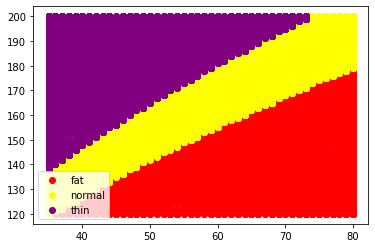

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col="label")

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(label, color):
    b = tbl.loc[label]
    ax.scatter(b["weight"],b["height"], c=color, label=label)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")

ax.legend()
plt.savefig("bmi-test.png")
plt.show()

### pandas.read_csv("<csv 파일이름>", index_col=2)

```python
tbl = pd.read_csv("bmi.csv", index_col=2) # 2열을 열 인덱스로 가져온다.

>>> [output]
        height  weight
label                 
normal     199      77
thin       185      57
fat        140      79
normal     152      49
fat        145      74
...        ...     ...
normal     177      68
normal     188      79
normal     173      74
thin       182      36
thin       183      52

tbl = pd.read_csv("bmi.csv", index_col="weight") # weight에 해당하는 열을 열 인덱스로 가져온다.

>>> [output]
        height   label
weight                
77         199  normal
57         185    thin
79         140     fat
49         152  normal
74         145     fat
...        ...     ...
68         177  normal
79         188  normal
74         173  normal
36         182    thin
52         183    thin
```

## SVM의 종류
scikit-learn에서는 세 가지 종류의 SVM을 지원
* SVC : 표준적으로 구현된 SVM
* NuSVC : 표준적으로 구현된 SVM <br>
위 2개는 오류 처리 방법이 약간 다르지만 수학적으로는 같다.
* LinearSVC : 선형 커널 특화된 SVM으로 계산이 빠르며, 다양한 옵션을 가지고 있다. 
```python
# 데이터 학습하기
clf = svm.LinearSVC() # SVC에 비해 정답률은 약간 떨어지지만 실행 시간이 크게 줄어든다.
clf.fit(data_train, label_train)
```
<br>
모두 여러개의 레이블 분류에 사용되며 SV[M]이 아니라 SV[C]인 이유는 Classificatioin(분류)의 앞 글자를 사용
